In [48]:
# imports
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

from basic_utils import *
from pricing import *

pd.options.display.float_format = '{:,.2f}'.format

Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile
Loading file quote/csv/2019-02-20
Loading file summary-categories/assetProfile


In [5]:
# average historical return during current and next two months
# fwd_ss_ret = lambda x, df, arr: df.loc[[y for y in arr[x-1] if y in df.index.tolist()]].mean()

# def co_price_mom_ds(symbol):
#     # Retrieves historical pricing
#     secpx = get_symbol_pricing(symbol, freq)
#     secpx.set_index(secpx.index.astype(np.datetime64), inplace=True)
#     closepx = secpx['close']

#     # industry, sector and market performance
#     row = profile[profile.symbol == symbol]
#     sec_sector, sec_industry = row.iloc[0].sector, row.iloc[0].industry    
    
#     # Note: since the universe is limited industry and sector
#     # are not a good representation, need to expand universe 
#     # for better learning
#     sec_index = to_index_form(closepx, symbol)
#     symbols = profile[profile.industry == sec_industry].symbol.tolist()
#     industry_index = get_ind_index(px_set[symbols], '1d', tail, ind_idx_ticker)[[ind_idx_ticker]]
#     symbols = profile[profile.sector == sec_sector].symbol.tolist()
#     sector_index = get_ind_index(px_set[symbols], '1d', tail, sect_idx_ticker)[[sect_idx_ticker]]
#     market_index = to_index_form(get_symbol_pricing(market_etf, freq, 'close').tail(tail), market_etf)

#     index_df = pd.DataFrame()
#     index_df = index_df.append(sec_index)
#     index_df[ind_idx_ticker] = industry_index
#     index_df[sect_idx_ticker] = sector_index
#     index_df[market_etf] = market_index
    
#     ind_sect_spy = index_df[[ind_idx_ticker, sect_idx_ticker, market_etf]]
#     index_df[['indChg1m', 'sectChg1m', 'spyChg1m']] = ind_sect_spy.pct_change(periods=20)
#     index_df[['indChg3m', 'sectChg3m', 'spyChg3m']] = ind_sect_spy.pct_change(periods=60)
#     index_df[['indChg6m', 'sectChg6m', 'spyChg6m']] = ind_sect_spy.pct_change(periods=180)
    
#     # apply 20sma upper and lower std bands, # stds from file
#     secpx = apply_std_boundaries(secpx, 'close', 20, stds)
#     secpx['pxPercStdUB'] = closepx / secpx['sma20ub']
#     secpx['pxPercStdLB'] = closepx / secpx['sma20lb']
    
#     # Volume averages
#     volume = secpx['volume']
#     secpx['volMa10'] = volume.rolling(20).mean()
#     secpx['volMa60'] = volume.rolling(60).mean()

#     # Volume as a % of 10 and 60 day average
#     secpx['volPercMa10'] = volume / secpx['volMa10']
#     secpx['volPercMa60'] = volume / secpx['volMa60']

#     # Price momentum transformations
#     secpx['pxMa20'] = closepx.rolling(20).mean()
#     secpx['pxMa50'] = closepx.rolling(50).mean()
#     secpx['pxMa200'] = closepx.rolling(200).mean()

#     # closing pricing as % of 20, 50 and 200 day average
#     secpx['pxPercMa20'] = closepx / secpx['pxMa20']
#     secpx['pxPercMa50'] = closepx / secpx['pxMa50']
#     secpx['pxPercMa200'] = closepx / secpx['pxMa200']

#     # historical returns for 1, 3, and 6 months
#     secpx['chg1m'] = closepx.pct_change(periods=20)
#     secpx['chg3m'] = closepx.pct_change(periods=60)
#     secpx['chg6m'] = closepx.pct_change(periods=180)

#     # Forward returns, 1w, 1m, 3m
#     secpx['fwdChg1w'] = closepx.pct_change(periods=-5)
#     secpx['fwdChg1m'] = closepx.pct_change(periods=-20)
#     secpx['fwdChg3m'] = closepx.pct_change(periods=-60) 
    
#     # Relative strength to industry, sector and market
#     secpx['rs1mInd'] = (secpx['chg1m'] / index_df['indChg1m'])
#     secpx['rs3mInd'] = (secpx['chg3m'] / index_df['indChg3m'])
#     secpx['rs6mInd'] = (secpx['chg6m'] / index_df['indChg6m'])

#     secpx['rs1mSect'] = (secpx['chg1m'] / index_df['sectChg1m'])
#     secpx['rs3mSect'] = (secpx['chg3m'] / index_df['sectChg3m'])
#     secpx['rs6mSect'] = (secpx['chg6m'] / index_df['sectChg6m'])

#     secpx['rs1mSPY'] = (secpx['chg1m'] / index_df['spyChg1m'])
#     secpx['rs3mSPY'] = (secpx['chg3m'] / index_df['spyChg3m'])
#     secpx['rs6mSPY'] = (secpx['chg6m'] / index_df['spyChg6m'])
    
#     # seasonality analysis
#     ss_df = closepx.pct_change().resample('M').sum().to_frame()
#     ss_df['year'], ss_df['month'] = ss_df.index.year, ss_df.index.month
#     ss_df = ss_df.pivot_table(index='year', columns='month').mean()
#     ss_pos = [(x, (x+1) if not (x+1) // 12 else 0, 
#          x+2 if not (x+2) // 12 else x - 10) for x in range(12)]
    
#     # apply seasonality, mean return of curr month plus next two
#     secpx['month'] = secpx.index.month
#     secpx['fwdSSRet'] = secpx.loc[:].month.apply(
#     fwd_ss_ret, args=(ss_df['close'], ss_pos,))
    
#     # normalized columns for ML training, still has outliers
#     ml_ds_cols = secpx.describe().loc['50%'][secpx.describe().loc['50%'] < 5].index.tolist()    
    
#     return secpx[ml_ds_cols]

### Get universe pricing

In [13]:
# TAKES LONG: all pricing loaded, should do only once
symbols_list = config['benchmarks'] + config['sectors'] + config['companies']
%time px_set = get_mults_pricing(symbols_list, freq, 'close')

Retrieved pricing for SPY
Retrieved pricing for QQQ
Retrieved pricing for DIA
Retrieved pricing for IWM
Retrieved pricing for IJR
Retrieved pricing for IJH
Retrieved pricing for FXI
Retrieved pricing for EEM
Retrieved pricing for ^DJI
Retrieved pricing for ^IXIC
Retrieved pricing for ^GSPC
Retrieved pricing for ^RUT
Retrieved pricing for XLB
Retrieved pricing for XLC
Retrieved pricing for XLE
Retrieved pricing for XLF
Retrieved pricing for XLI
Retrieved pricing for XLK
Retrieved pricing for XLP
Retrieved pricing for XLRE
Retrieved pricing for XLU
Retrieved pricing for XLV
Retrieved pricing for XLY
Retrieved pricing for 0700.HK
Retrieved pricing for 1810.HK
Retrieved pricing for 3690.HK
Retrieved pricing for 9984.T
Retrieved pricing for A
Retrieved pricing for AAPL
Retrieved pricing for ABBV
Retrieved pricing for ABC
Retrieved pricing for ABT
Retrieved pricing for ADBE
Retrieved pricing for ADI
Retrieved pricing for ADSK
Retrieved pricing for AEIS
Retrieved pricing for AEO
Retrieved pri

Retrieved pricing for VRSK
Retrieved pricing for VRSN
Retrieved pricing for VRTX
Retrieved pricing for VSH
Retrieved pricing for WAT
Retrieved pricing for WB
Retrieved pricing for WCG
Retrieved pricing for WDAY
Retrieved pricing for WDC
Retrieved pricing for WIX
Retrieved pricing for WST
Retrieved pricing for WUBA
Retrieved pricing for WWE
Retrieved pricing for XLNX
Retrieved pricing for XRAY
Retrieved pricing for YELP
Retrieved pricing for YY
Retrieved pricing for ZBH
Retrieved pricing for ZEN
Retrieved pricing for ZTS
Retrieved pricing for ZUO
CPU times: user 7.48 s, sys: 850 ms, total: 8.33 s
Wall time: 1min 47s


### Full universe dataset creation

In [46]:
# all equities
excl_list = ['CELG'] 
profile.drop(profile[profile.symbol.isin(excl_list)].index, inplace=True)
all_equities = quotes[quotes.quoteType == 'EQUITY'].symbol.unique()
eqty_symbols = profile[profile.symbol.isin(all_equities)].symbol.unique().tolist()

treshold = (8 * 252) # at least 8 years of pricing
tail = (10 ** 4) # no tail
count_df = px_set[eqty_symbols].describe().loc['count']
ds_symbols = count_df[count_df > treshold].index.tolist()

In [47]:
ds_name = 'co_price_mom_ds'
update_fmt = 'Added {} to {} dataset'

In [48]:
# Running for entire universe takes a while
dt = datetime.now()
ml_ds_df = pd.DataFrame()
for s in ds_symbols:
    print(update_fmt.format(s, ds_name))
    ml_ds = co_price_mom_ds(s)
    ml_ds_df = ml_ds_df.append(ml_ds.copy(), sort=False)
datetime.now() - dt

Added A to co_price_mom_ds dataset
Added AAPL to co_price_mom_ds dataset
Added ABC to co_price_mom_ds dataset
Added ABT to co_price_mom_ds dataset
Added ADBE to co_price_mom_ds dataset
Added ADI to co_price_mom_ds dataset
Added ADSK to co_price_mom_ds dataset
Added AEIS to co_price_mom_ds dataset
Added AEO to co_price_mom_ds dataset
Added AGN to co_price_mom_ds dataset
Added AKAM to co_price_mom_ds dataset
Added ALGN to co_price_mom_ds dataset
Added ALXN to co_price_mom_ds dataset
Added AMAT to co_price_mom_ds dataset
Added AMD to co_price_mom_ds dataset
Added AMGN to co_price_mom_ds dataset
Added AMZN to co_price_mom_ds dataset
Added ANSS to co_price_mom_ds dataset
Added ANTM to co_price_mom_ds dataset
Added APH to co_price_mom_ds dataset
Added ATVI to co_price_mom_ds dataset
Added AVGO to co_price_mom_ds dataset
Added AVX to co_price_mom_ds dataset
Added BAX to co_price_mom_ds dataset
Added BBY to co_price_mom_ds dataset
Added BC to co_price_mom_ds dataset
Added BDX to co_price_mom_d

datetime.timedelta(seconds=353, microseconds=176908)

In [49]:
med_cutoff = ml_ds_df.describe().loc['50%']
ml_ds_cols = med_cutoff[med_cutoff < 3].index.tolist()
ml_ds_df = ml_ds_df[ml_ds_cols]
ml_ds_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544188 entries, 2009-02-20 to 2019-02-19
Data columns (total 24 columns):
sma20bw        540046 non-null float64
pxPercStdUB    540046 non-null float64
pxPercStdLB    540046 non-null float64
volPercMa10    539879 non-null float64
volPercMa60    531314 non-null float64
pxPercMa20     540046 non-null float64
pxPercMa50     533506 non-null float64
pxPercMa200    500806 non-null float64
chg1m          539828 non-null float64
chg3m          531108 non-null float64
chg6m          504948 non-null float64
fwdChg1w       543098 non-null float64
fwdChg1m       539828 non-null float64
fwdChg3m       531108 non-null float64
rs1mInd        539824 non-null float64
rs3mInd        531105 non-null float64
rs6mInd        504947 non-null float64
rs1mSect       539828 non-null float64
rs3mSect       531107 non-null float64
rs6mSect       504948 non-null float64
rs1mSPY        539828 non-null float64
rs3mSPY        531108 non-null float64
rs6mSPY        

In [50]:
# Discretize forward returns into consistent classes
class_cols = ['fwdChg1w', 'fwdChg1m', 'fwdChg3m']
cut_range = [-1, -0.05, .0, .02, .09, 1.]
fwd_ret_labels = ["bear", "short", "neutral", "long", "bull"]
for c in class_cols:
    ml_ds_df[c] = pd.cut(ml_ds_df[c], cut_range, labels=fwd_ret_labels)

In [51]:
# Drop records showing nans
ml_ds_df.dropna(inplace=True)
ml_ds_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 486913 entries, 2009-12-03 to 2018-11-19
Data columns (total 24 columns):
sma20bw        486913 non-null float64
pxPercStdUB    486913 non-null float64
pxPercStdLB    486913 non-null float64
volPercMa10    486913 non-null float64
volPercMa60    486913 non-null float64
pxPercMa20     486913 non-null float64
pxPercMa50     486913 non-null float64
pxPercMa200    486913 non-null float64
chg1m          486913 non-null float64
chg3m          486913 non-null float64
chg6m          486913 non-null float64
fwdChg1w       486913 non-null category
fwdChg1m       486913 non-null category
fwdChg3m       486913 non-null category
rs1mInd        486913 non-null float64
rs3mInd        486913 non-null float64
rs6mInd        486913 non-null float64
rs1mSect       486913 non-null float64
rs3mSect       486913 non-null float64
rs6mSect       486913 non-null float64
rs1mSPY        486913 non-null float64
rs3mSPY        486913 non-null float64
rs6mSPY     

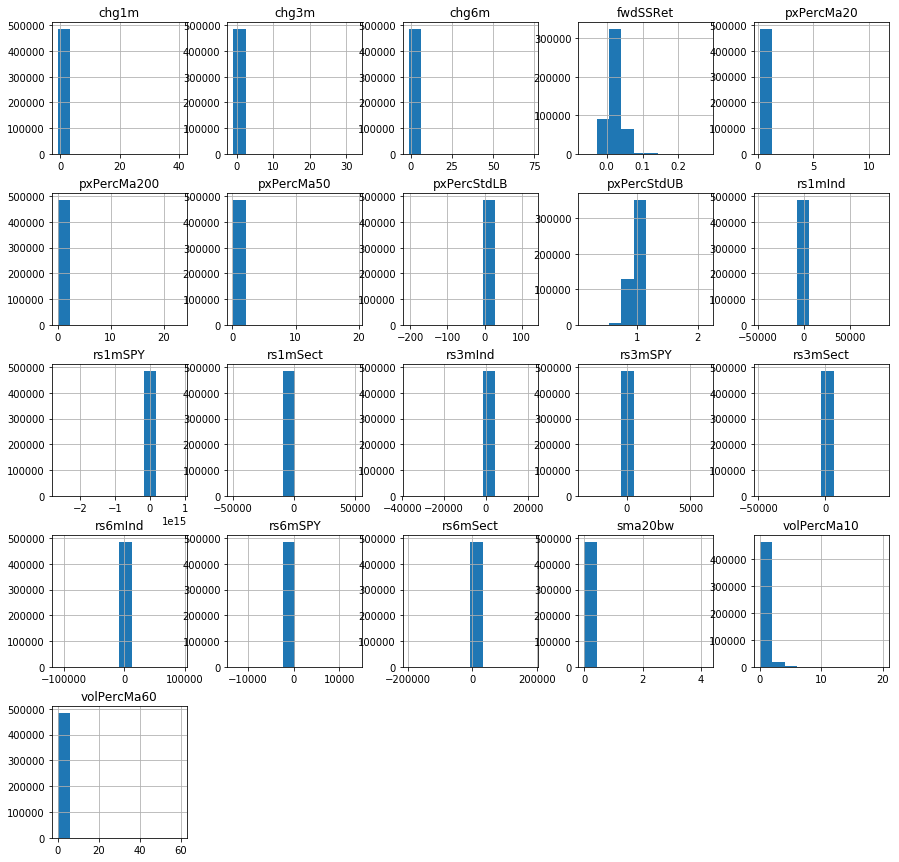

In [52]:
# Gut check only
ml_ds_df.hist(figsize=(15,15));

In [1171]:
print(update_fmt.format(len(ml_ds_df), ds_name))
csv_store(ml_ds_df, 'training/', csv_ext.format('co_price_mom_ds'))
ml_ds_df.to_csv(csv_ext.format('co_price_mom_ds'), index=False)

Added 489174 to co_price_mom_ds dataset
Saved training/co_price_mom_ds.csv


### Single company in one shot

In [50]:
symbol = 'AAPL'
excl_list = ['ORBK']
profile.drop(profile[profile.symbol.isin(excl_list)].index, inplace=True)

In [51]:
# del co_price_mom_ds

In [54]:
ml_ds = co_price_mom_ds(symbol, px_set)
ml_ds_cols = cutoff_tresh_cols(ml_ds, '50%', 3)
ml_ds = ml_ds[ml_ds_cols]
ml_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2009-02-23 to 2019-02-20
Data columns (total 24 columns):
sma20bw        2497 non-null float64
pxPercStdUB    2497 non-null float64
pxPercStdLB    2497 non-null float64
volPercMa10    2497 non-null float64
volPercMa60    2457 non-null float64
pxPercMa20     2497 non-null float64
pxPercMa50     2467 non-null float64
pxPercMa200    2317 non-null float64
chg1m          2496 non-null float64
chg3m          2456 non-null float64
chg6m          2336 non-null float64
fwdChg1w       2511 non-null float64
fwdChg1m       2496 non-null float64
fwdChg3m       2456 non-null float64
rs1mInd        2496 non-null float64
rs3mInd        2456 non-null float64
rs6mInd        2336 non-null float64
rs1mSect       2496 non-null float64
rs3mSect       2456 non-null float64
rs6mSect       2336 non-null float64
rs1mSPY        2496 non-null float64
rs3mSPY        2456 non-null float64
rs6mSPY        2336 non-null float64
fwdSSRet       2516 non-

In [87]:
class_cols = ['fwdChg1w', 'fwdChg1m', 'fwdChg3m']
Xs = [x for x in ml_ds_cols if x not in class_cols]
base_name = 'ds_co_price_mom_'
for y in class_cols:
    ds_cols = Xs + [y]
    fname = base_name + y
    csv_store(ml_ds_df[ds_cols].dropna(), 'training/', csv_ext.format(fname))
    print(update_fmt.format(len(ml_ds_df), fname))

ds_co_price_mom_fwdChg1w ['sma20bw', 'pxPercStdUB', 'pxPercStdLB', 'volPercMa10', 'volPercMa60', 'pxPercMa20', 'pxPercMa50', 'pxPercMa200', 'chg1m', 'chg3m', 'chg6m', 'rs1mInd', 'rs3mInd', 'rs6mInd', 'rs1mSect', 'rs3mSect', 'rs6mSect', 'rs1mSPY', 'rs3mSPY', 'rs6mSPY', 'fwdSSRet', 'fwdChg1w']
ds_co_price_mom_fwdChg1m ['sma20bw', 'pxPercStdUB', 'pxPercStdLB', 'volPercMa10', 'volPercMa60', 'pxPercMa20', 'pxPercMa50', 'pxPercMa200', 'chg1m', 'chg3m', 'chg6m', 'rs1mInd', 'rs3mInd', 'rs6mInd', 'rs1mSect', 'rs3mSect', 'rs6mSect', 'rs1mSPY', 'rs3mSPY', 'rs6mSPY', 'fwdSSRet', 'fwdChg1m']
ds_co_price_mom_fwdChg3m ['sma20bw', 'pxPercStdUB', 'pxPercStdLB', 'volPercMa10', 'volPercMa60', 'pxPercMa20', 'pxPercMa50', 'pxPercMa200', 'chg1m', 'chg3m', 'chg6m', 'rs1mInd', 'rs3mInd', 'rs6mInd', 'rs1mSect', 'rs3mSect', 'rs6mSect', 'rs1mSPY', 'rs3mSPY', 'rs6mSPY', 'fwdSSRet', 'fwdChg3m']


In [57]:
ml_ds.iloc[-1].values

array([ 0.07520395,  0.96115697,  1.11747856,  0.83438989,  0.63417011,
        1.03343976,  1.06923453,  0.89787488,  0.1221787 , -0.02796925,
       -0.09572123,         nan,         nan,         nan,  0.4480912 ,
       -0.19057569, -0.32822912,  0.89876268, -0.15179565,  5.29095246,
        2.06532827, -0.51695119, -5.44476955,  0.03437911])

### Single company dataset step-by-step

In [1103]:
# Retrieves historical pricing
secpx = get_symbol_pricing(symbol, freq)
secpx.set_index(secpx.index.astype(np.datetime64), inplace=True)

In [1104]:
# some clean ups
# profile.loc[profile[profile.symbol == 'ATHN'].index,:] # will happen 
# profile.drop([28], inplace=True)

In [1105]:
# Note: since the universe is limited industry and sector
# are not a good representation, need to expand universe 
# for better learning
sec_index = to_index_form(get_symbol_pricing(symbol, freq, 'close'), symbol)

symbols = profile[profile.industry == sec_industry].symbol.tolist()
industry_index = get_ind_index(px_set[symbols], '1d', tail, ind_idx_ticker)[[ind_idx_ticker]]
symbols = profile[profile.sector == sec_sector].symbol.tolist()
sector_index = get_ind_index(px_set[symbols], '1d', tail, sect_idx_ticker)[[sect_idx_ticker]]
market_index = to_index_form(get_symbol_pricing(market_etf, freq, 'close').tail(tail), market_etf)

index_df = pd.DataFrame()
index_df = index_df.append(sec_index)
index_df[ind_idx_ticker] = industry_index
index_df[sect_idx_ticker] = sector_index
index_df[market_etf] = market_index

In [1106]:
# industry, sector and market performance
row = profile[profile.symbol == symbol]
sec_sector, sec_industry = row.iloc[0].sector, row.iloc[0].industry
sec_sector, sec_industry

ind_sect_spy = index_df[[ind_idx_ticker, sect_idx_ticker, market_etf]]
index_df[['indChg1m', 'sectChg1m', 'spyChg1m']] = ind_sect_spy.pct_change(periods=20)
index_df[['indChg3m', 'sectChg3m', 'spyChg3m']] = ind_sect_spy.pct_change(periods=60)
index_df[['indChg6m', 'sectChg6m', 'spyChg6m']] = ind_sect_spy.pct_change(periods=180)

In [1107]:
# apply 20sma upper and lower std bands, # stds from file
secpx = apply_std_boundaries(secpx, 'close', 20, stds)
closepx = secpx['close']
secpx['pxPercStdUB'] = closepx / secpx['sma20ub']
secpx['pxPercStdLB'] = closepx / secpx['sma20lb']

In [1108]:
# Volume averages
volume = secpx['volume']
secpx['volMa10'] = volume.rolling(20).mean()
secpx['volMa60'] = volume.rolling(60).mean()

# volume as a % of 10 and 60 day average
secpx['volPercMa10'] = volume / secpx['volMa10']
secpx['volPercMa60'] = volume / secpx['volMa60']

# Price momentum transformations
secpx['pxMa20'] = closepx.rolling(20).mean()
secpx['pxMa50'] = closepx.rolling(50).mean()
secpx['pxMa200'] = closepx.rolling(200).mean()

# closing pricing as % of 20, 50 and 200 day average
secpx['pxPercMa20'] = closepx / secpx['pxMa20']
secpx['pxPercMa50'] = closepx / secpx['pxMa50']
secpx['pxPercMa200'] = closepx / secpx['pxMa200']

# historical returns for 1, 3, and 6 months
secpx['chg1m'] = closepx.pct_change(periods=20)
secpx['chg3m'] = closepx.pct_change(periods=60)
secpx['chg6m'] = closepx.pct_change(periods=180)

# Forward returns, 1w, 1m, 3m
secpx['fwdChg1w'] = ((closepx.shift(-5) - closepx) / closepx)
secpx['fwdChg1m'] = ((closepx.shift(-20) - closepx) / closepx)
secpx['fwdChg3m'] = ((closepx.shift(-60) - closepx) / closepx)

In [1109]:
# relative strength to industry, sector and market
secpx['rs1mInd'] = (secpx['chg1m'] / index_df['indChg1m'])
secpx['rs3mInd'] = (secpx['chg3m'] / index_df['indChg3m'])
secpx['rs6mInd'] = (secpx['chg6m'] / index_df['indChg6m'])

secpx['rs1mSect'] = (secpx['chg1m'] / index_df['sectChg1m'])
secpx['rs3mSect'] = (secpx['chg3m'] / index_df['sectChg3m'])
secpx['rs6mSect'] = (secpx['chg6m'] / index_df['sectChg6m'])

secpx['rs1mSPY'] = (secpx['chg1m'] / index_df['spyChg1m'])
secpx['rs3mSPY'] = (secpx['chg3m'] / index_df['spyChg3m'])
secpx['rs6mSPY'] = (secpx['chg6m'] / index_df['spyChg6m'])

In [1110]:
fwd_ss_ret = lambda x, df, arr:\
    df.loc[[y for y in arr[x-1] if y in df.index.tolist()]].mean()
# [y for y in ss_pos[7-1] if y in ss_df.index.levels[1].tolist()]
# ss_df.loc[('close'),[7, 8]]
# ss_df['close'].loc[[7,8]]

In [1111]:
# seasonality analysis
ss_df = closepx.pct_change().resample('M').sum().to_frame()
ss_df['year'], ss_df['month'] = ss_df.index.year, ss_df.index.month
ss_df = ss_df.pivot_table(index='year', columns='month').mean()
ss_pos = [(x, (x+1) if not (x+1) // 12 else 0, 
     x+2 if not (x+2) // 12 else x - 10) for x in range(12)]

# [fwd_ss_ret(x+1, ss_df['close'], ss_pos) for x in range(12)] # test

In [1112]:
# apply seasonality, mean return of curr month plus next two
secpx['month'] = secpx.index.month
secpx['fwdSSRet'] = secpx.loc[:].month.apply(
    fwd_ss_ret, args=(ss_df['close'], ss_pos,))

In [1113]:
secpx.columns # all columns

Index(['high', 'low', 'open', 'close', 'volume', 'sma20', 'sma20ub', 'sma20lb',
       'sma20bw', 'pxPercStdUB', 'pxPercStdLB', 'volMa10', 'volMa60',
       'volPercMa10', 'volPercMa60', 'pxMa20', 'pxMa50', 'pxMa200',
       'pxPercMa20', 'pxPercMa50', 'pxPercMa200', 'chg1m', 'chg3m', 'chg6m',
       'fwdChg1w', 'fwdChg1m', 'fwdChg3m', 'rs1mInd', 'rs3mInd', 'rs6mInd',
       'rs1mSect', 'rs3mSect', 'rs6mSect', 'rs1mSPY', 'rs3mSPY', 'rs6mSPY',
       'month', 'fwdSSRet'],
      dtype='object')

In [1114]:
# normalized columns for ML training, still has outliers
ml_ds_cols = secpx.describe().loc['50%'][secpx.describe().loc['50%'] < 5].index.tolist()
ml_ds_cols

['sma20bw',
 'pxPercStdUB',
 'pxPercStdLB',
 'volPercMa10',
 'volPercMa60',
 'pxPercMa20',
 'pxPercMa50',
 'pxPercMa200',
 'chg1m',
 'chg3m',
 'chg6m',
 'fwdChg1w',
 'fwdChg1m',
 'fwdChg3m',
 'rs1mInd',
 'rs3mInd',
 'rs6mInd',
 'rs1mSect',
 'rs3mSect',
 'rs6mSect',
 'rs1mSPY',
 'rs3mSPY',
 'rs6mSPY',
 'fwdSSRet']

In [1115]:
# prepare ML dataset
ml_ds = secpx[ml_ds_cols].copy()

class_cols = ['fwdChg1w', 'fwdChg1m', 'fwdChg3m']
cut_range = [-1, -0.05, .0, .02, .09, 1.]
fwd_ret_labels = ["bear", "short", "neutral", "long", "bull"]

for c in class_cols: 
    ml_ds[c] = pd.cut(secpx[c], cut_range, labels=fwd_ret_labels)
    
ml_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2009-02-20 to 2019-02-19
Data columns (total 24 columns):
sma20bw        2497 non-null float64
pxPercStdUB    2497 non-null float64
pxPercStdLB    2497 non-null float64
volPercMa10    2497 non-null float64
volPercMa60    2457 non-null float64
pxPercMa20     2497 non-null float64
pxPercMa50     2467 non-null float64
pxPercMa200    2317 non-null float64
chg1m          2496 non-null float64
chg3m          2456 non-null float64
chg6m          2336 non-null float64
fwdChg1w       2511 non-null category
fwdChg1m       2496 non-null category
fwdChg3m       2456 non-null category
rs1mInd        2496 non-null float64
rs3mInd        2456 non-null float64
rs6mInd        2336 non-null float64
rs1mSect       2496 non-null float64
rs3mSect       2456 non-null float64
rs6mSect       2336 non-null float64
rs1mSPY        2496 non-null float64
rs3mSPY        2456 non-null float64
rs6mSPY        2336 non-null float64
fwdSSRet       2516 n

In [1116]:
# drop the predicting class with most nas
ml_ds.dropna(inplace=True)
ml_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2257 entries, 2009-12-03 to 2018-11-19
Data columns (total 24 columns):
sma20bw        2257 non-null float64
pxPercStdUB    2257 non-null float64
pxPercStdLB    2257 non-null float64
volPercMa10    2257 non-null float64
volPercMa60    2257 non-null float64
pxPercMa20     2257 non-null float64
pxPercMa50     2257 non-null float64
pxPercMa200    2257 non-null float64
chg1m          2257 non-null float64
chg3m          2257 non-null float64
chg6m          2257 non-null float64
fwdChg1w       2257 non-null category
fwdChg1m       2257 non-null category
fwdChg3m       2257 non-null category
rs1mInd        2257 non-null float64
rs3mInd        2257 non-null float64
rs6mInd        2257 non-null float64
rs1mSect       2257 non-null float64
rs3mSect       2257 non-null float64
rs6mSect       2257 non-null float64
rs1mSPY        2257 non-null float64
rs3mSPY        2257 non-null float64
rs6mSPY        2257 non-null float64
fwdSSRet       2257 n

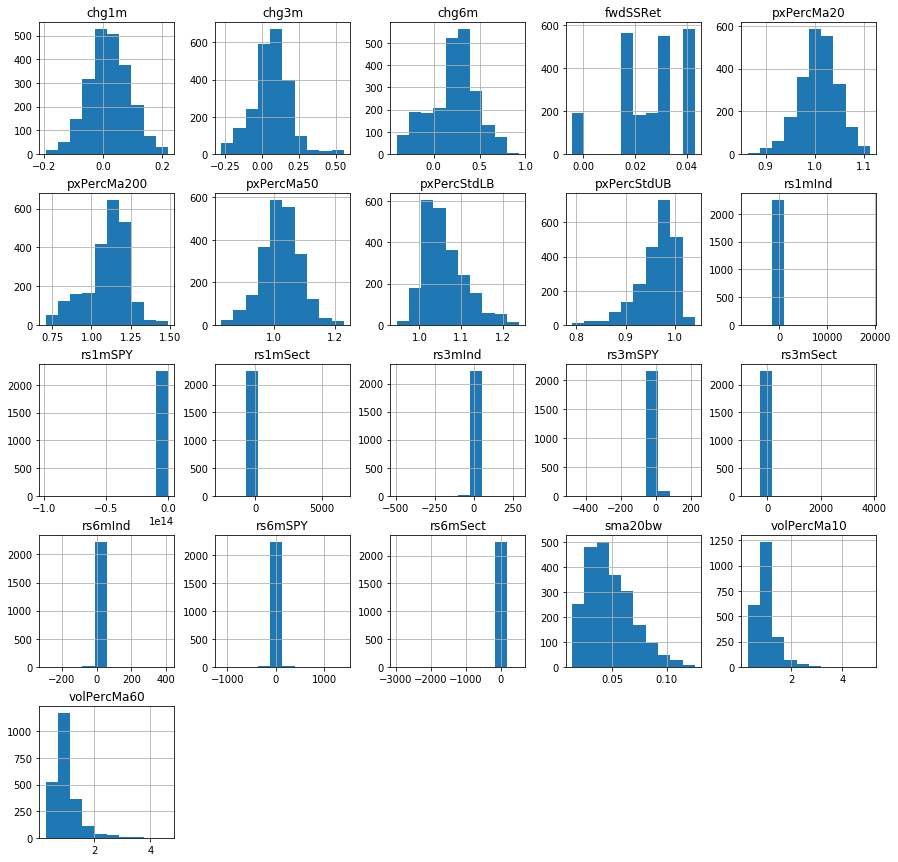

In [1117]:
ml_ds.hist(figsize=(15,15));

In [622]:
ml_ds.to_csv(csv_ext.format('co_price_mom_ds'), index=False)